In [1]:
import pandas as pd
import numpy as np
import math
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# load processed data
data = pd.read_csv('adult/trainData.csv')
test = pd.read_csv('adult/testData.csv')

# sort data by the value of income
data.sort_values("income",inplace=True)
test.sort_values("income",inplace=True)
data.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
15080,1.337102,-1.127046,-0.831902,-0.147445,-0.218586,-0.077734,2.0,2.0,2.0,9.0,0.0,4.0,1.0,38.0,0
14202,1.793916,-0.818257,1.128918,1.272982,-0.218586,0.757005,2.0,9.0,6.0,3.0,1.0,4.0,1.0,38.0,0
14205,-0.261747,-0.875682,1.913247,-0.147445,-0.218586,2.009115,4.0,14.0,2.0,9.0,0.0,4.0,1.0,38.0,0
14206,1.032559,-0.407784,1.128918,-0.147445,-0.218586,0.757005,2.0,9.0,2.0,9.0,0.0,4.0,1.0,38.0,0
14212,-0.566290,-0.312830,1.521083,-0.147445,-0.218586,2.927328,2.0,12.0,2.0,11.0,0.0,4.0,1.0,38.0,0
14214,0.575745,-0.430121,1.521083,-0.147445,-0.218586,-0.077734,2.0,12.0,2.0,9.0,0.0,4.0,1.0,38.0,0
14216,1.413238,-0.816506,1.521083,-0.147445,-0.218586,-0.244682,4.0,12.0,2.0,12.0,0.0,4.0,1.0,38.0,0
14218,-0.490154,1.498877,1.521083,-0.147445,-0.218586,-0.077734,2.0,12.0,2.0,3.0,0.0,4.0,1.0,38.0,0
14220,0.575745,1.438395,1.128918,0.890601,-0.218586,0.339636,0.0,9.0,2.0,9.0,0.0,4.0,1.0,38.0,0
14222,1.337102,-0.753004,1.128918,-0.147445,-0.218586,-0.077734,4.0,9.0,3.0,9.0,1.0,4.0,0.0,38.0,0


In [3]:
# count two labels in data/test
numData_0 = list(data.income).count(0)
numData_1 = list(data.income).count(1)
numData = numData_0 + numData_1

numTest_0 = list(test.income).count(0)
numTest_1 = list(test.income).count(1)
numTest = numTest_0 + numTest_1

print("Total: %d, >50K: %d, <=50K: %d" % (numData, numData_0, numData_1))
print("Total: %d, >50K: %d, <=50K: %d" % (numTest, numTest_0, numTest_1))

Total: 30162, >50K: 7508, <=50K: 22654
Total: 16281, >50K: 3846, <=50K: 12435


In [4]:
# training dataset
X = data.iloc[:,0:14].values
y = data.iloc[:,14].values

X0, y0 = X[0:numData_0], y[0:numData_0]
X1, y1 = X[numData_0:numData], y[numData_0:numData]

X0_train, y0_train = X0, y0
X1_train, y1_train = X1, y1

X_train = np.vstack([X0_train, X1_train])
y_train = np.hstack([y0_train, y1_train])

In [5]:
# testing dataset
A = test.iloc[:,0:14].values
b = test.iloc[:,14].values
A0, b0 = A[0:numTest_0], b[0:numTest_0]
A1, b1 = A[numTest_0:numTest], b[numTest_0:numTest]

X0_test, y0_test = A0, b0
X1_test, y1_test = A1, b1

X_test = np.vstack([X0_test, X1_test])
y_test = np.hstack([y0_test, y1_test])

In [6]:
# build knn classifier
def knnClassifier(k, X_train, y_train ,X_test):
    # define predicting label list
    y_pred = []
    
    X, y= np.array(X_train), np.array(y_train)
    
    for x in X_test:
        # calculate Euclidean distance
        sum_square = np.sum((x - X) ** 2, axis=1)
        distances = np.sqrt(sum_square)
        
        # get top k nearest samples by distance
        indices = np.argsort(distances)[:k]
        
        # count the label in k samples
        k_labels = y[indices]
        label_counts = np.bincount(k_labels)
        y_pred.append(np.argmax(label_counts))
        
    return np.array(y_pred)

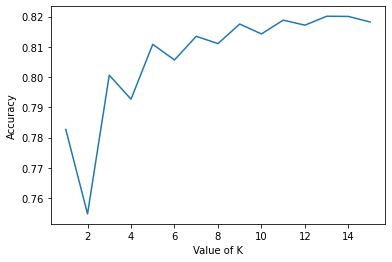

best K:13 accuracy:0.8200970456360175


In [7]:
# adjust value of k to get the best result
k_values = range(1, 16)
best_accuracy = 0
accuracies = []

for k in k_values:
    
    y_pred = knnClassifier(k, X_train, y_train ,X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # upgrade best k value
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        
# visualize the process      
plt.plot(k_values, accuracies)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.show()

print("best K:%d accuracy:%s" % (best_k,best_accuracy))

In [8]:
start_time = time.time()
y_pred = knnClassifier(best_k, X_train, y_train ,X_test)
total_time = time.time() - start_time
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:%s" % best_accuracy)
print("spend %.2fs" % total_time)

accuracy:0.8200970456360175
spend 61.99s
